# Hadamard Example 1
### CS4243
#### Amir - 2022

In [75]:
from scipy.linalg import hadamard
import numpy as np
import cv2
from matplotlib import pyplot as plt



In [2]:
# to show a 4x4 natural hadamard matrix and an 8x8 one
print('4x4 Natural Hadamard Matrix:\n', hadamard(4) )

print('\n8x8 Natural Hadamard Matrix:\n', hadamard(8) )


4x4 Natural Hadamard Matrix:
 [[ 1  1  1  1]
 [ 1 -1  1 -1]
 [ 1  1 -1 -1]
 [ 1 -1 -1  1]]

8x8 Natural Hadamard Matrix:
 [[ 1  1  1  1  1  1  1  1]
 [ 1 -1  1 -1  1 -1  1 -1]
 [ 1  1 -1 -1  1  1 -1 -1]
 [ 1 -1 -1  1  1 -1 -1  1]
 [ 1  1  1  1 -1 -1 -1 -1]
 [ 1 -1  1 -1 -1  1 -1  1]
 [ 1  1 -1 -1 -1 -1  1  1]
 [ 1 -1 -1  1 -1  1  1 -1]]


In [3]:
# inline function to convert integer numbers to binary strings, and showing an example, 
# x is the number and n is the bit length of its binary representation

int2bin = lambda x, n: format(x, 'b').zfill(n)

print(int2bin(11, 6))

001011


In [70]:
# horder function to convert the row number of the natural
# hadamard matrix to the sequency ordered row number
#
def horder(b,nn): 
    jj = int2bin(b,nn)
    kk = ''
    for j in range(nn): 
        kk = kk+jj[nn-1-j]
    kkk=np.zeros(nn) 
    kkk[0] = kk[0] 
    

    for j in range(1,nn):
        kkk[j] = int(kkk[j-1]) ^ int(kk[j]) 
    k=0
    for j in range(nn):
        k = k + int(kkk[j]) * 2**(nn-1-j)  

    return int(k)

In [71]:
# h = ordhad(n) 
# generate a n*n ordered hadamard matrix
# amir - may 2022
#

def ordhad(n): 
    h = hadamard(n)
    hh = hadamard(n)
    nn = np.log2(n)
    for i in range(n):
        k = horder(int(i) , int(nn)) 
        hh[k][:] = h[i][:]

    return hh

In [72]:
ordhad(8)

array([[ 1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  1,  1, -1, -1, -1, -1],
       [ 1,  1, -1, -1, -1, -1,  1,  1],
       [ 1,  1, -1, -1,  1,  1, -1, -1],
       [ 1, -1, -1,  1,  1, -1, -1,  1],
       [ 1, -1, -1,  1, -1,  1,  1, -1],
       [ 1, -1,  1, -1, -1,  1, -1,  1],
       [ 1, -1,  1, -1,  1, -1,  1, -1]])

In [59]:
# to show a 4x4 sequency/frequency ordered hadamard matrix and an 8x8 one
print('4x4 Freq Ordered Hadamard Matrix:\n', ordhad(4) )
print('4x4 Hadamard Matrix:\n', hadamard(4) )

print('\n8x8 Freq Ordered Hadamard Matrix:\n', ordhad(8) )


4x4 Freq Ordered Hadamard Matrix:
 [[ 1  1  1  1]
 [ 1  1 -1 -1]
 [ 1 -1 -1  1]
 [ 1 -1  1 -1]]
4x4 Hadamard Matrix:
 [[ 1  1  1  1]
 [ 1 -1  1 -1]
 [ 1  1 -1 -1]
 [ 1 -1 -1  1]]

8x8 Freq Ordered Hadamard Matrix:
 [[ 1  1  1  1  1  1  1  1]
 [ 1  1  1  1 -1 -1 -1 -1]
 [ 1  1 -1 -1 -1 -1  1  1]
 [ 1  1 -1 -1  1  1 -1 -1]
 [ 1 -1 -1  1  1 -1 -1  1]
 [ 1 -1 -1  1 -1  1  1 -1]
 [ 1 -1  1 -1 -1  1 -1  1]
 [ 1 -1  1 -1  1 -1  1 -1]]


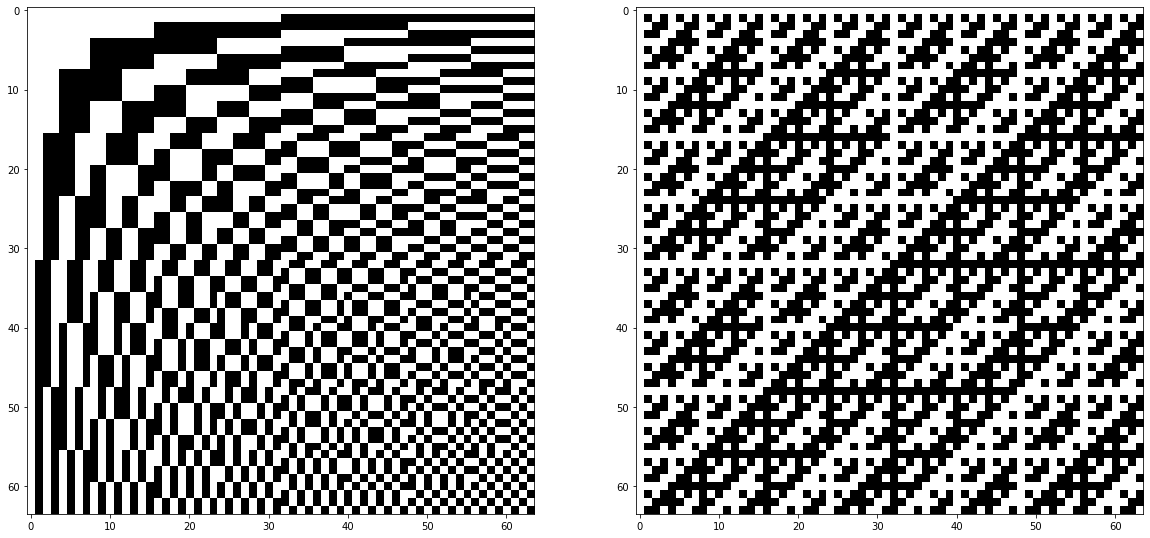

In [77]:
# Hadamard matrices, 64x64
ddd = (ordhad(64) + 1 )
eee = (hadamard(64)+ 1 )

fig,axes = plt.subplots(1,2, figsize=(20,10))

axes[0].imshow(ddd, 'gray')
axes[1].imshow(eee, 'gray')


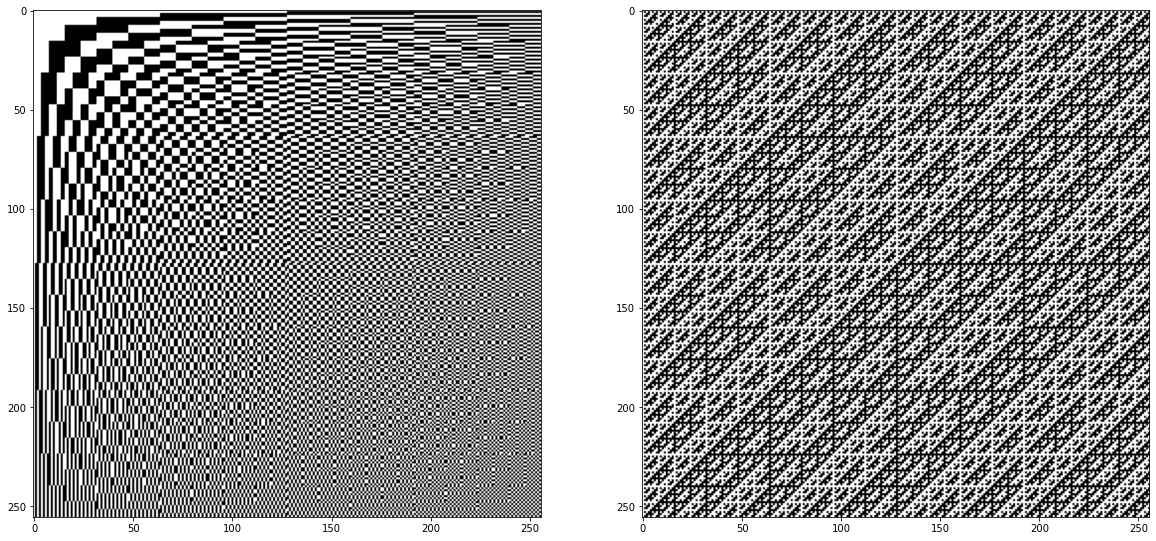

In [79]:
# Hadamard matrices, 256x256
ddd = (ordhad(256) + 1 )
eee = (hadamard(256)+ 1 )
fig,axes = plt.subplots(1,2, figsize=(20,10))

axes[0].imshow(ddd, 'gray')
axes[1].imshow(eee, 'gray')

In [80]:
# Example: Hadamard transform of a 512x512 image
# 1- building the freq ordered Hadamard matrix, size=512x512, equal to the supposed
# image size
h = ordhad(512)


In [81]:
# reading image, conversion to graylevel, resize to 512x512
img = cv2.imread('../../Examples/set1/cat.bmp')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img,(512,512))

In [83]:
# Transform: HI = h*img*h , matrix multiplication
HI = np.matmul( h, np.matmul(img,h) )

In [13]:
# showing the shape and contents of the HI, i.e. Hadamard transform of the  img
HI.shape


(512, 512)

In [14]:
HI

array([[23685287,     5111,  4911629, ...,    63215,    14493,    24677],
       [ 2958021,  4230353,  3857647, ...,     8725,     8939,    11183],
       [ 1083301,   434741, -1867833, ...,   -30151,   -14813,   -11597],
       ...,
       [  -14713,    -4321,     -855, ...,       -9,      153,      153],
       [    8379,     3919,   -13387, ...,     -297,       21,     -199],
       [    1401,    14857,     6183, ...,      189,       67,      -61]])

In [15]:
# sum of the all pixels of the img, check the HI[0,0] too !!??
np.sum(img)

23685287

In [85]:
HI[0,0]

23685287

In [17]:
'''There are three main ways to perform NumPy matrix multiplication:
dot(array a, array b) : returns the scalar or dot product of two arrays.
matmul(array a, array b) : returns the matrix product of two arrays.
multiply(array a, array b) : returns the element-wise matrix multiplication of two arrays.'''

'There are three main ways to perform NumPy matrix multiplication:\ndot(array a, array b) : returns the scalar or dot product of two arrays.\nmatmul(array a, array b) : returns the matrix product of two arrays.\nmultiply(array a, array b) : returns the element-wise matrix multiplication of two arrays.'

In [18]:
''' in tests below we are going to build some 4x4 given binary images and compute their freq
ordered Hadamard transform to hive you some hints about an image and the distribution 
of its frequency components '''

' in tests below we are going to build some 4x4 given binary images and compute their freq\nordered Hadamard transform to hive you some hints about an image and the distribution \nof its frequency components '

In [88]:
img = np.ones((4,4))
h = ordhad(4)
H = np.matmul( h, np.matmul(img,h))
print('Image=\n', img , '\n Hadamard=')
print(H)

Image=
 [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]] 
 Hadamard=
[[16.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


In [89]:
img = np.array([[1,1,0,0],[1,1,0,0],[1,1,0,0],[1,1,0,0]])
h = ordhad(4)
H = np.matmul( h, np.matmul(img,h))
print('Image=\n', img , '\n Hadamard=')
print(H)

Image=
 [[1 1 0 0]
 [1 1 0 0]
 [1 1 0 0]
 [1 1 0 0]] 
 Hadamard=
[[8 8 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


In [92]:
img = np.array([[1,0,1,0],[1,0,1,0],[1,0,1,0],[1,0,1,0]])
h = ordhad(4)
H = np.matmul( h, np.matmul(img,h))
print('Image=\n', img , '\n Hadamard=')
print(H)

Image=
 [[1 0 1 0]
 [1 0 1 0]
 [1 0 1 0]
 [1 0 1 0]] 
 Hadamard=
[[8 0 0 8]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


In [93]:
img = np.array([[1,0,1,0],[0,1,0,1],[1,0,1,0],[0,1,0,1]])
h = ordhad(4)
H = np.matmul( h, np.matmul(img,h))

print('Image=\n', img , '\n Hadamard=')
print(H)

Image=
 [[1 0 1 0]
 [0 1 0 1]
 [1 0 1 0]
 [0 1 0 1]] 
 Hadamard=
[[8 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 8]]


In [95]:
img = np.array([[0,0,0,0],[0,1,1,0],[0,1,1,0],[0,0,0,0]])
h = ordhad(4)
H = np.matmul( h, np.matmul(img,h))

print('Image=\n', img , '\n Hadamard=')
print(H)

Image=
 [[0 0 0 0]
 [0 1 1 0]
 [0 1 1 0]
 [0 0 0 0]] 
 Hadamard=
[[ 4  0 -4  0]
 [ 0  0  0  0]
 [-4  0  4  0]
 [ 0  0  0  0]]


In [96]:
# inverse hadamard
h2 = np.dot( np.matmul( h, np.matmul(H,h)) , 1/(4**2) )
print('Image=\n', img , '\n Inverse Hadamard=')
print(h2)

Image=
 [[0 0 0 0]
 [0 1 1 0]
 [0 1 1 0]
 [0 0 0 0]] 
 Inverse Hadamard=
[[0. 0. 0. 0.]
 [0. 1. 1. 0.]
 [0. 1. 1. 0.]
 [0. 0. 0. 0.]]
